In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import plot_confusion_matrix

# Load the data from data.csv
data = pd.read_csv('data.csv', header=None)
data.head(5)

c:\Users\gavin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,0.000000e+00,1.000000,2.000000,3.000000e+00,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,39.00000,40.0000,41.0000,42.0000,43.0000,44.0000,45.0000,46.0000,47.0000,48
1,-3.014000e-06,-0.000044,-0.000278,-6.710100e-06,-0.000015,-0.000113,0.010787,0.010831,0.011108,0.002458,...,-0.71593,1.6617,12.1770,-1.5040,-1.5041,-1.5044,-1.4984,-1.4985,-1.4984,5
2,-4.532700e-06,-0.000027,0.000115,2.347100e-07,-0.000022,-0.000318,0.025578,0.025605,0.025490,0.025175,...,-0.61186,2.1574,6.7002,-1.4944,-1.4944,-1.4940,-1.5048,-1.5048,-1.5049,8
3,-9.615600e-07,0.000002,-0.000006,4.854600e-06,0.000006,-0.000015,0.006317,0.006315,0.006321,-0.035309,...,-0.48252,6.0859,16.2140,-1.4998,-1.4998,-1.4998,-1.4975,-1.4975,-1.4975,9
4,1.856800e-06,-0.000013,-0.000139,-2.323100e-06,-0.000059,0.000184,0.008755,0.008768,0.008907,-0.041292,...,-0.69714,0.6127,5.6592,-1.5036,-1.5036,-1.5033,-1.4945,-1.4945,-1.4944,9


In [3]:
#  K-Nearest Neighbor only using Numpy and Pandas

def euc_distance(point_1, point_2): 
    return np.sqrt(np.sum((point_1 - point_2) ** 2))

def k_nearest_neighbors(train_data, test_point, k):
    features = train_data.iloc[:, :-1] # Except last since last column is a label 
    labels = train_data.iloc[:, -1]
    
    distance = features.apply(lambda row: euc_distance(test_point, row), axis=1) # Computing distances from train point
    
    sorted_indices = distance.argsort() # Index of distance
    
    kn_labels = labels.iloc[sorted_indices[:k]] # Labels
    
    predicted_label = kn_labels.value_counts().idxmax() # Value count
    
    return predicted_label


In [4]:
# K-Means only using Numpy and Pandas
def kmeans(data, k, max_iters=100):
    # Initialize centroids
    centroids = data.sample(k).values
    
    for _ in range(max_iters):
        distances = np.sqrt(((data.values - centroids[:, np.newaxis])**2).sum(axis=2)) # Computing Distance
        clusters = np.argmin(distances, axis=0) # Assigning Clusters
        updated_centroids = np.array([data.values[clusters == i].mean(axis=0) for i in range(k)]) # Calculating Centroids again
        
        if np.all(centroids == updated_centroids): # Checks for convergence and if it converges, it stops
            break
            
        centroids = updated_centroids
        
    return clusters, centroids

In [5]:
# SVM using Scikit-Learn

X = data.iloc[:, :-1] # Except last since last column is a label 
y = data.iloc[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splitting into train and test sets

SVM_Classifier = SVC().fit(X_train, y_train) # Train and Predict
y_pred = SVM_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 15.35%


In [6]:
# Logistic Regression using Scikit-Learn

X = data.iloc[:, :-1] # Except last since last column is a label 
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splitting into train and test sets

LR_Classifier = LogisticRegression(max_iter=1000).fit(X_train, y_train) # Train and Predict
y_pred = LR_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")


Accuracy: 77.86%


c:\Users\gavin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 10.99%


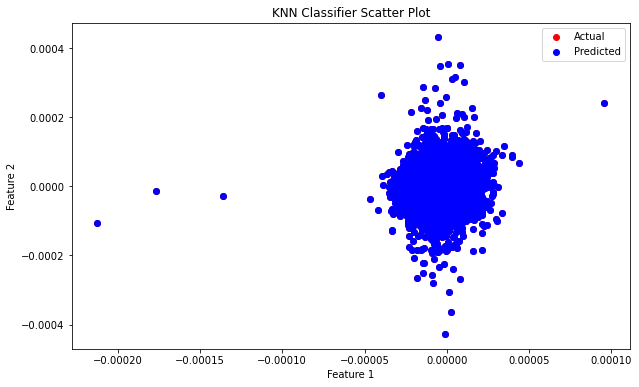

In [27]:
# K-NN using Scikit-Learn

X = data.iloc[:, :-1] # Except last since last column is a label 
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splitting into train and test sets

KNN_Classifier = KNeighborsClassifier().fit(X_train, y_train) # Train and Predict
y_pred = KNN_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

# Visualize the results using scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], color='red', marker='o', label='Actual') # For Actual
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], color='blue', marker='o', label='Predicted') # For Predicted

plt.legend()
plt.title('KNN Classifier Scatter Plot')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
# Ensemble model using the Voting Classifier

X = data.iloc[:, :-1] # Except last since last column is a label 
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # Splitting into train and test sets

# Create a Voting Classifier with the base classifiers
Ensemble_Classifier = VotingClassifier(
    estimators=[('svm', SVM_Classifier), ('logistic', LR_Classifier), ('knn', KNN_Classifier)], voting='hard' # Above mentioned algorithm | "Hard" to get the majority
)

Ensemble_Classifier.fit(X_train, y_train) # Train and Predict
y_pred = Ensemble_Classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")

c:\Users\gavin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 34.01%


c:\Users\gavin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\gavin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gavin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confu

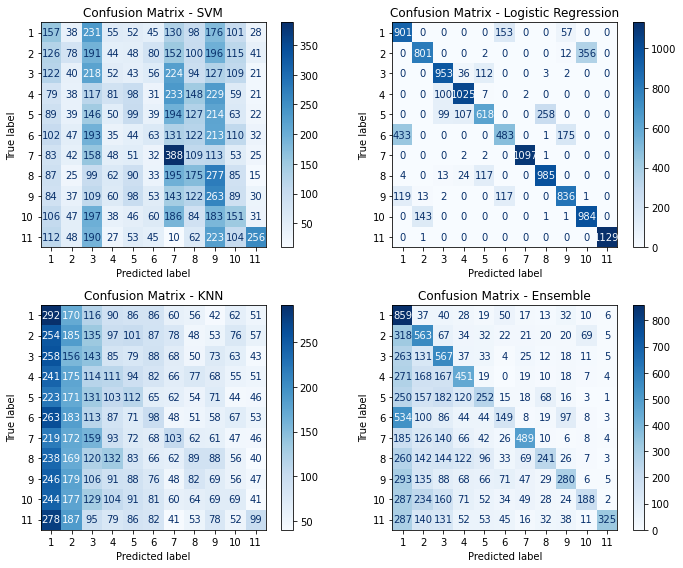

In [9]:
# Confusion Matrix for all of the Classifiers

X = data.iloc[:, :-1]  # Except last since last column is a label 
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Splitting into train and test sets

# Create a Voting Classifier with the base classifiers
Ensemble_Classifier = VotingClassifier(
    estimators=[('svm', SVM_Classifier), ('logistic', LR_Classifier), ('knn', KNN_Classifier)], voting='hard'  # Above mentioned algorithm | "Hard" to get the majority
)

classifiers = {
    'SVM': SVM_Classifier,
    'Logistic Regression': LR_Classifier,
    'KNN': KNN_Classifier,
    'Ensemble': Ensemble_Classifier
}

# Confusion Matrix Plotting
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for ax, (title, clf) in zip(axes.ravel(), classifiers.items()):
    clf.fit(X_train, y_train)
    plot_confusion_matrix(clf, X_test, y_test, ax=ax, cmap=plt.cm.Blues, values_format='d')
    ax.set_title(f"Confusion Matrix - {title}")

plt.tight_layout()
plt.show()